In this assignment students need to predict whether a person makes over
50K per year or not from classic adult dataset using XGBoost. The
description of the dataset is as follows:
Data Set Information:
Extraction was done by Barry Becker from the 1994 Census
database. A set of reasonably clean records was extracted using the
following conditions: ((AAGE>16) && (AGI>100) &&
(AFNLWGT>1)&& (HRSWK>0))

Attribute Information:
Listing of attributes: >50K, <=50K.
age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov,
Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school,
Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th,
Doctorate, 5th-6th, Preschool.
education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married,
Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-
managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct,

Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv,
Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative,
Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico,
Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,
Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy,
Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France,
Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,

Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-
Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Following is the code to load required libraries and data:
import numpy as np
import pandas as pd

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-
learning-databases/adult/adult.dat a', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-
databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [142]:
import numpy as np 
import pandas as pd

train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test' , skiprows = 1, header = None)

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class'] 
train_set.columns = col_labels 
test_set.columns = col_labels

In [143]:
print("Size of data: ")
print("Train:",train_set.shape)
print("Test:",test_set.shape)

Size of data: 
Train: (32561, 15)
Test: (16281, 15)


In [144]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [145]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [146]:
print("Check for Nulls")
train_set.isnull().sum()

Check for Nulls


age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [147]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [148]:
print("Lets compare the type of data types in train and test data")
pd.DataFrame([train_set.dtypes,test_set.dtypes],index=['train_set','test_set']).T

Lets compare the type of data types in train and test data


,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


In [149]:
print("categorical columns: \n",*[col for col in train_set.columns if train_set[col].dtypes=='object'])
cat_cols = [col for col in train_set.columns if train_set[col].dtypes=='object']

categorical columns: 
 workclass education marital_status occupation relationship race sex native_country wage_class


In [150]:
train_set.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

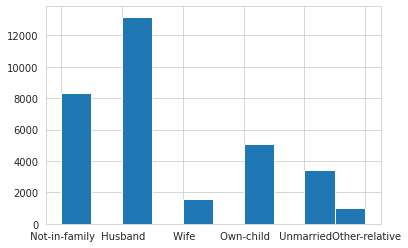

In [151]:
train_set.relationship.hist()

In [152]:
def test_prep(x):
  x =x[:-1]
  return x
test_set['wage_class'] = test_set['wage_class'].apply(test_prep)
test_set['wage_class'].unique()  

array([' <=50K', ' >50K'], dtype=object)

In [153]:
X_train = train_set.copy()
X_test = test_set.copy()


In [154]:
print("Converting Category columns to Numeric")

Converting Category columns to Numeric


In [155]:
!pip install category_encoders


In [156]:
from category_encoders import *
enc = OrdinalEncoder(cols=cat_cols).fit(X_train[cat_cols])
X_train[cat_cols] = enc.transform(X_train[cat_cols])
X_test[cat_cols] = enc.transform(X_test[cat_cols])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [157]:
test_set['wage_class']

0         <=50K
1         <=50K
2          >50K
3          >50K
4         <=50K
          ...  
16276     <=50K
16277     <=50K
16278     <=50K
16279     <=50K
16280      >50K
Name: wage_class, Length: 16281, dtype: object

In [158]:
train_set['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [159]:
X_test['wage_class'].unique()

array([1, 2])

In [160]:
X_train['wage_class'].unique()

array([1, 2])

In [161]:
X_test[cat_cols].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,3,3,1,10,4,2,1,1,1
1,3,2,2,9,2,1,1,1,1
2,5,7,2,13,2,1,1,1,2
3,3,6,2,10,2,2,1,1,2
4,6,6,1,12,4,1,2,1,1


In [162]:
X_train[cat_cols].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
0,1,1,1,1,1,1,1,1,1
1,2,1,2,2,2,1,1,1,1
2,3,2,3,3,1,1,1,1,1
3,3,3,2,3,2,2,1,1,1
4,3,1,2,4,3,2,2,2,1


In [163]:
X_train = X_train.astype(int)

In [164]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,1,77516,1,13,1,1,1,1,1,2174,0,40,1,1
1,50,2,83311,1,13,2,2,2,1,1,0,0,13,1,1
2,38,3,215646,2,9,3,3,1,1,1,0,0,40,1,1
3,53,3,234721,3,7,2,3,2,2,1,0,0,40,1,1
4,28,3,338409,1,13,2,4,3,2,2,0,0,40,2,1


In [165]:
X_train.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.309972,1.897784e+05,4.424465,10.080679,2.083781,5.666411,2.542397,1.221707,1.330795,1077.648844,87.303830,40.437456,2.290317,1.240810
std,13.640433,1.225728,1.055500e+05,3.453582,2.572720,1.251381,3.386119,1.437431,0.627348,0.470506,7385.292085,402.960219,12.347429,5.045373,0.427581
min,17.000000,1.000000,1.228500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,28.000000,3.000000,1.178270e+05,2.000000,9.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,1.000000
50%,37.000000,3.000000,1.783560e+05,3.000000,10.000000,2.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,1.000000
75%,48.000000,3.000000,2.370510e+05,6.000000,12.000000,2.000000,8.000000,4.000000,1.000000,2.000000,0.000000,0.000000,45.000000,1.000000,1.000000
max,90.000000,9.000000,1.484705e+06,16.000000,16.000000,7.000000,15.000000,6.000000,5.000000,2.000000,99999.000000,4356.000000,99.000000,42.000000,2.000000


In [166]:
X_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,3,226802,3,7,1,10,4,2,1,0,0,40,1,1
1,38,3,89814,2,9,2,9,2,1,1,0,0,50,1,1
2,28,5,336951,7,12,2,13,2,1,1,0,0,40,1,2
3,44,3,160323,6,10,2,10,2,2,1,7688,0,40,1,2
4,18,6,103497,6,10,1,12,4,1,2,0,0,30,1,1


In [167]:
X_test.describe()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
count,16281.000000,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,3.315030,1.894357e+05,4.386954,10.072907,2.084270,5.731159,2.531171,1.217309,1.332965,1081.905104,87.899269,40.392236,2.241140,1.236226
std,13.849187,1.246499,1.057149e+05,3.440725,2.567545,1.269622,3.425948,1.445369,0.622232,0.471289,7583.935968,403.105286,12.479332,4.941919,0.424776
min,17.000000,1.000000,1.349200e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,28.000000,3.000000,1.167360e+05,2.000000,9.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,1.000000
50%,37.000000,3.000000,1.778310e+05,3.000000,10.000000,2.000000,5.000000,2.000000,1.000000,1.000000,0.000000,0.000000,40.000000,1.000000,1.000000
75%,48.000000,3.000000,2.383840e+05,6.000000,12.000000,2.000000,8.000000,4.000000,1.000000,2.000000,0.000000,0.000000,45.000000,1.000000,1.000000
max,90.000000,9.000000,1.490400e+06,16.000000,16.000000,7.000000,15.000000,6.000000,5.000000,2.000000,99999.000000,3770.000000,99.000000,41.000000,2.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


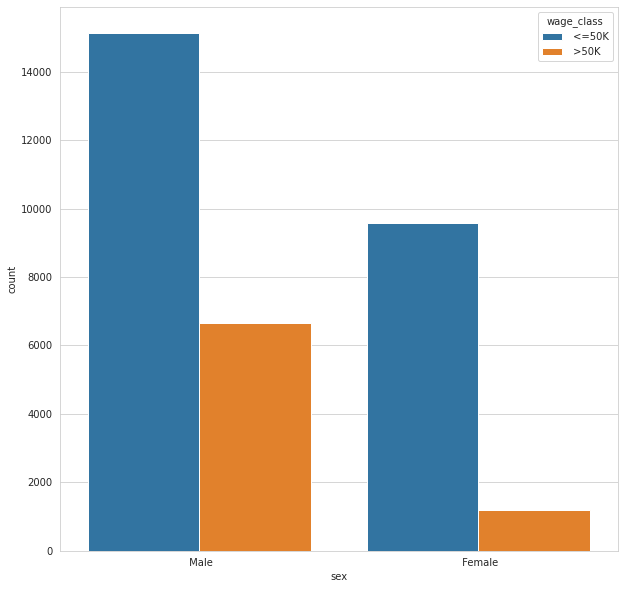

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.countplot('sex',data=train_set,hue='wage_class')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


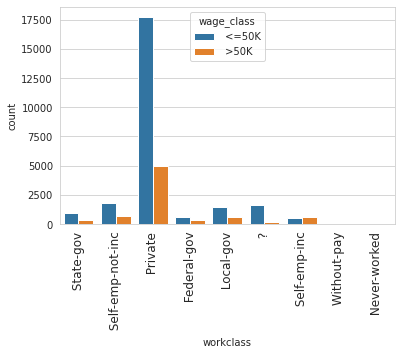

In [169]:
g = sns.countplot('workclass',data=train_set,hue='wage_class')
g.set_xticklabels(g.get_xticklabels(),rotation=90,fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


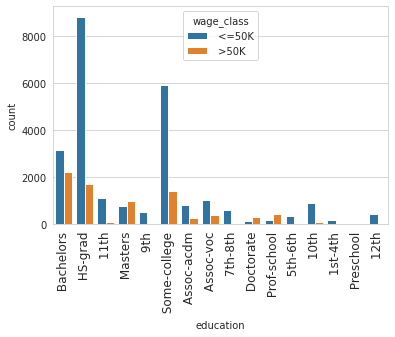

In [170]:
g = sns.countplot('education',data=train_set,hue='wage_class')
g.set_xticklabels(g.get_xticklabels(),rotation=90,fontsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


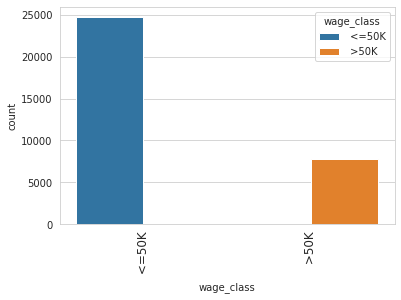

In [171]:
g = sns.countplot('wage_class',data=train_set,hue='wage_class')
g.set_xticklabels(g.get_xticklabels(),rotation=90,fontsize=12)
plt.show()

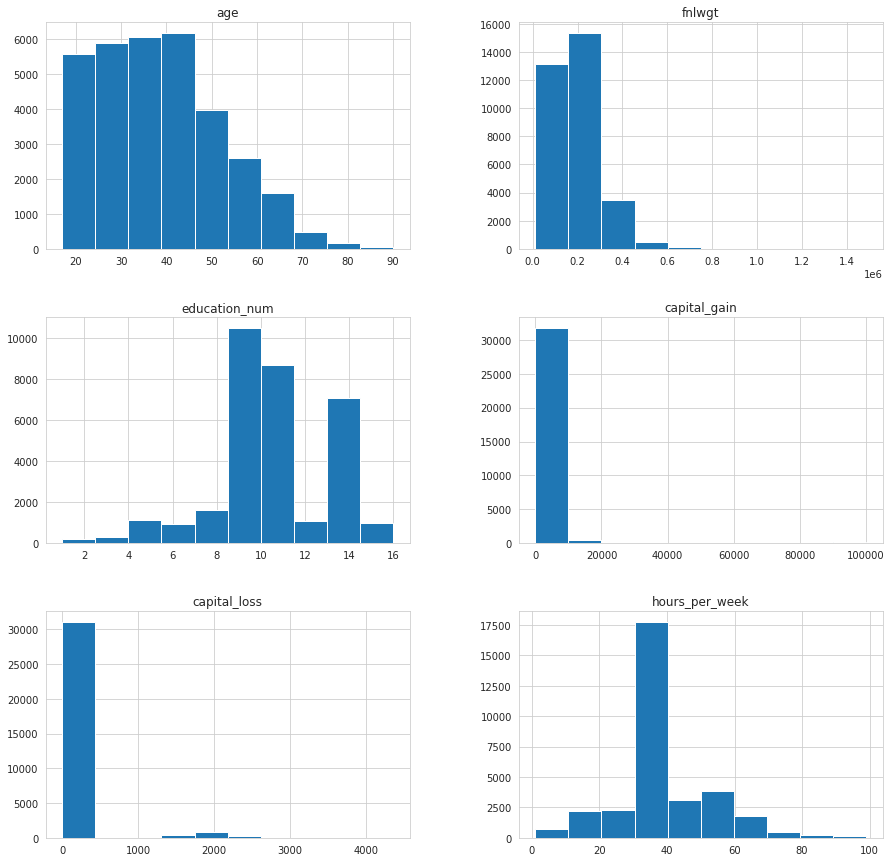

In [172]:
pd.DataFrame.hist(train_set,figsize=[15,15])
plt.show()

In [173]:
x_train = X_train.drop('wage_class',axis=1)
y_train = X_train['wage_class']
x_test = X_test.drop('wage_class',axis=1)
y_test = X_test['wage_class'] 

In [174]:
from xgboost.sklearn import XGBClassifier

params ={
    'objective':'binary:logistic',
    'max_depth':2,
    'learning_rate':1.0,
    'n_estimators':5
}
params['eval_metric'] = ['logloss','auc']

In [175]:
bst = XGBClassifier(**params).fit(x_train.values,y_train.values)

In [176]:
predict = bst.predict(x_test.values)
predict

array([1, 1, 1, ..., 2, 1, 2])

In [177]:
pred_prob = bst.predict_proba(x_test.values)
pred_prob

array([[0.9862895 , 0.01371049],
       [0.6448917 , 0.35510832],
       [0.8749048 , 0.1250952 ],
       ...,
       [0.282     , 0.718     ],
       [0.71667016, 0.28332984],
       [0.17598617, 0.8240138 ]], dtype=float32)

In [178]:
correct = 0
from sklearn.metrics import accuracy_score
for i in range(len(predict)):
  if(y_test[i]==predict[i]):
    correct+=1
acc = accuracy_score(y_test.values,predict)
print("Correctly predicated :{0}/{1}".format(correct,len(predict)))
print("Accuracy:",acc)
print("Error: {0:.4f}".format(1-acc))    

Correctly predicated :13897/16281
Accuracy: 0.8535716479331736
Error: 0.1464


In [179]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           1       0.87      0.95      0.91     12435
           2       0.76      0.55      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.82      0.75      0.77     16281
weighted avg       0.85      0.85      0.85     16281



In [182]:
! pip install scikit-plot

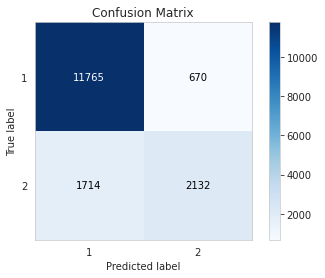

In [183]:
import scikitplot
scikitplot.metrics.plot_confusion_matrix(y_test,predict)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


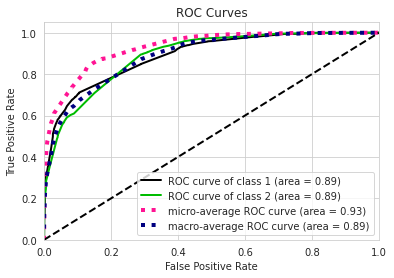

In [184]:
scikitplot.metrics.plot_roc_curve(y_test,pred_prob)